Table of Contents

1. Import Libraries and Dataframes

2. Remove PIIs 

3. Create and Implement Regions 

4. Create an Exclusion Flag for Low Activity Customers

5. Create New Dataframe with High Activity Customers

6. Export high activity customers daraframe

7. Create Customers Profiles

8.  Create Customer Profile distribution bar chart and export

9. Aggregate Mean, Max, Min on Customer Profiles for Expenditure and User Frequency 

10. Comparison of Regions and Departments Based on Customer Profiles Visualisations

11. Export Dataframes

Question 1. Import Libraries and Dataframes

1. Import Libraries and Dataframes

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = '/Users/ianfleming/Desktop/05-2025 Instacart Basket Analysis'

In [3]:
# Import dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Check import
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Check shape
df_merged.shape

(32434489, 33)

Question 2. Consider the security implications that could exist in the data.

2. Remove PIIs 

In [6]:
# Check columns
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_per_user', 'spending_flag', 'median_days_per_user',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependents', 'fam_status', 'income',
       'merge_flag'],
      dtype='object')

Before starting the analysis, I will examine the dataframe for any Personally Identifiable Information (PII). These include 'user_id', 'first_name', and 'last_name'. In the real world, I would ask a senior colleague or whoever is in charge of data security. For the assignment I will create a new dataframe (df_merged_anon and drop 'first_name' and 'last_name' columns, as 'user_id' on its own would not personally identify a customer.

In [7]:
# Drop 'first_name' and 'last_name' columns 
df_merged_anon = df_merged.drop(columns=['first_name', 'last_name'])

In [8]:
# Check output
df_merged_anon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   first_order             bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                float64 
 12  department_id           float64 
 13  prices                  float64 
 14  price_range_loc         object  
 15  busiest_days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  avg_price_per_user      float64 
 20  spending_flag           object  
 21  median

The new dataframe has 31 columns and customers are no longer identifiable

Question 3. The Instacart officers are interested in comparing customer behavior in different geographic areas.

3. Create and Implement Regions 

Define Regions

In [9]:
# Define region 1 Northeast
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 
'New York', 'Pennsylvania', 'New Jersey']

In [10]:
# Define region 2 Midwest
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
# Define region 3 South
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia','West Virginia', 'North Carolina', 
'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
'Texas', 'Arkansas', 'Louisiana']

In [12]:
# Define region 4 West
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington',
'Oregon', 'California', 'Hawaii']

In [13]:
# Define the region assignment function
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'
        

In [14]:
# Create a new column - 'region'
df_merged_anon['region'] = df_merged_anon['state'].apply(assign_region)

In [15]:
# Check output
df_merged_anon.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [16]:
# Check how many rows in 'region' column
df_merged_anon['region'].value_counts()

region
South        10801796
West          8300481
Midwest       7603861
Northeast     5728351
Name: count, dtype: int64

In [17]:
# Check does it total the number of rows in dataframe
df_merged_anon['region'].value_counts().sum()

32434489

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [18]:
# Check spending habits across regions
pd.crosstab(df_merged_anon['region'], df_merged_anon['spending_flag'])

spending_flag,High spender,Low spender
region,,
Midwest,29298,7574563
Northeast,18662,5709689
South,40643,10761153
West,31256,8269225


The vast majority of customers in all regions were classified as low spenders. The South had the largest number of total customers overall, and also the highest absolute number of high spenders (40,643), followed by the West (31,256). However, when looking proportionally, the share of high spenders across regions is very similar — around 0.33–0.39% of each region’s customers fall into this category. This suggests that spending habits are relatively consistent across U.S. regions, with no significant geographic bias in high or low spending behaviour.

Question 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

4. Create an Exclusion Flag for Low Activity Customers

In [19]:
# Group orders by 'user_id'
customer_order_counts = df_merged_anon.groupby('user_id')['order_number'].nunique()

In [20]:
# Create a flag column
customer_flags = customer_order_counts.to_frame(name='total_orders')

In [21]:
# Customers with less than 5 orders
customer_flags['exclusion_flag'] = customer_flags['total_orders'] < 5

In [22]:
# Merge flag into dataframe
df_merged_anon = df_merged_anon.merge(customer_flags[['exclusion_flag']], on='user_id', how='left')

In [23]:
# Check merge
df_merged_anon.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In [24]:
# Check shape
df_merged_anon.shape

(32434489, 33)

In [25]:
# Check how many false and how many true
df_merged_anon['exclusion_flag'].value_counts()

exclusion_flag
False    30992966
True      1441523
Name: count, dtype: int64

5. Create New Dataframe with High Activity Customers

In [26]:
# Create dataframe without low activity customers
df_excluded = df_merged_anon[df_merged_anon['exclusion_flag'] == False].copy()

In [27]:
# Check counts
df_excluded['exclusion_flag'].value_counts()

exclusion_flag
False    30992966
Name: count, dtype: int64

As there are no True(s) in the dataframe, this shows that it contains only high activity customers as per the CFO#s request

In [28]:
# Check dataframe
df_excluded.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In [29]:
df_excluded.shape

(30992966, 33)

The new dataframe now contains the 30992966 rows of high activity customers. Note to self: This dataframe is anon with regions and high activity customers

6. Export high activity customers daraframe

In [30]:
# Export high activity customers dataframe 
df_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

To keep track of dataframes and what they conatin, I will change df_excluded to df_anon_high. I am now working with this dataframe for the rest of this task.

In [31]:
df_anon_high = df_excluded

In [32]:
df_anon_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,False


In the new dataframe, I will add a 'profile' column and fill it in as I create customer profiles 

7. Create Customers Profiles

In [33]:
# Create an empty column called 'profile' 
df_anon_high['profile'] = np.nan

In [34]:
# Tell pandas the column contains text not numbers
df_anon_high['profile'] = pd.Series(dtype='object')

I want to use age, income, different products in 'department_id' and number of dependents to create customers profiles so I will need the department_id information.

In [35]:
df_anon_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_per_user', 'spending_flag', 'median_days_per_user',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependents', 'fam_status', 'income', 'merge_flag', 'region',
       'exclusion_flag', 'profile'],
      dtype='object')

In [36]:
# Import departments dataframe
df_dep_t_new = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [37]:
# Check import
df_dep_t_new

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
# Rename Unnamed to department_id
df_dep_t_new.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [39]:
# Merge departments with df_anon_high using department_id key
df_anon_high_dept = df_anon_high.merge(df_dep_t_new, on='department_id', how='left')

In [40]:
# Check merge
df_anon_high_dept.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag,profile,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,both,South,False,NaN,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31,2/17/2019,3,married,40423,both,South,False,NaN,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31,2/17/2019,3,married,40423,both,South,False,NaN,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31,2/17/2019,3,married,40423,both,South,False,NaN,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31,2/17/2019,3,married,40423,both,South,False,NaN,household


Now that department names have been added, I will create profiles for customers based on a couple of departments as well as age, income and number of dependents. 

In [41]:
# Create an empty column called 'profile' 
df_anon_high_dept['profile'] = np.nan

In [42]:
df_anon_high_dept['profile'] = ''

In [43]:
# Profile 1: New Parent – based on baby department (department_id == 18)
df_anon_high_dept.loc[
    df_anon_high_dept['department_id'] == 18,
    'profile'] = 'New Parent'


In [44]:
# Profile 2: Young Parent – age under 35, with dependents
df_anon_high_dept.loc[
    (df_anon_high_dept['age'] < 35) &
    (df_anon_high_dept['n_dependents'] > 0) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Young Parent'


In [45]:
# Profile 3: Affluent Family – high income, multiple dependents
df_anon_high_dept.loc[
    (df_anon_high_dept['income'] > 100000) &
    (df_anon_high_dept['n_dependents'] >= 2) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Affluent Family'


In [46]:
# Profile 4: Young Budget Single – under 30, no dependents, low income
df_anon_high_dept.loc[
    (df_anon_high_dept['age'] < 30) &
    (df_anon_high_dept['n_dependents'] == 0) &
    (df_anon_high_dept['income'] < 40000),
    'profile'] = 'Young Budget Single'


In [47]:
# Profile 5: Young Single Adult – under 30, no dependents, not budget
df_anon_high_dept.loc[
    (df_anon_high_dept['age'] < 30) &
    (df_anon_high_dept['n_dependents'] == 0) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Young Single Adult'


In [48]:
# Profile 6: Senior Shopper – age 60+
df_anon_high_dept.loc[
    (df_anon_high_dept['age'] >= 60) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Senior Shopper'


In [49]:
# Profile 7: Late Shopper – orders placed 8pm or later
df_anon_high_dept.loc[
    (df_anon_high_dept['order_hour_of_day'] >= 20) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Late Shopper'


In [50]:
# Profile 8: Budget-Conscious – low income and low avg spend
df_anon_high_dept.loc[
    (df_anon_high_dept['income'] < 50000) &
    (df_anon_high_dept['avg_price_per_user'] < 5) &
    (df_anon_high_dept['profile'] == ''),
    'profile'] = 'Budget-Conscious'


In [51]:
# Profile 9: Other – catch-all
df_anon_high_dept.loc[
    df_anon_high_dept['profile'] == '',
    'profile'] = 'Other'


In [52]:
# Check how many customers fall into each category
df_anon_high_dept['profile'].value_counts()

profile
Other                  8579469
Affluent Family        6887565
Senior Shopper         6743373
Young Parent           6104747
Young Single Adult     1323515
Late Shopper            815358
New Parent              409645
Young Budget Single     105830
Budget-Conscious         23464
Name: count, dtype: int64

In [53]:
# Check all rows were assigned
df_anon_high_dept['profile'].isna().sum()  

0

A large number of customers fall into the 'Other' profile

In [54]:
# Check distribution
df_anon_high_dept['profile'].value_counts(normalize=True).round(3) * 100

profile
Other                  27.7
Affluent Family        22.2
Senior Shopper         21.8
Young Parent           19.7
Young Single Adult      4.3
Late Shopper            2.6
New Parent              1.3
Young Budget Single     0.3
Budget-Conscious        0.1
Name: proportion, dtype: float64

In [55]:
# Export high activity customers with profiles dataframe 
df_anon_high_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_with_profiles.pkl'))

In [56]:
df_anon_high_dept.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag,profile,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,household


In [57]:
df_anon_high_dept.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_per_user', 'spending_flag', 'median_days_per_user',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependents', 'fam_status', 'income', 'merge_flag', 'region',
       'exclusion_flag', 'profile', 'department'],
      dtype='object')

In [58]:
# Change name of dataframe to include profiles
df_anon_high_prof = df_anon_high_dept

In [59]:
df_anon_high_prof.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependents,fam_status,income,merge_flag,region,exclusion_flag,profile,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31,2/17/2019,3,married,40423,both,South,False,Young Parent,household


Question 6. Create an appropriate visualization to show the distribution of profiles

8.  Create Customer Profile distribution bar chart and export

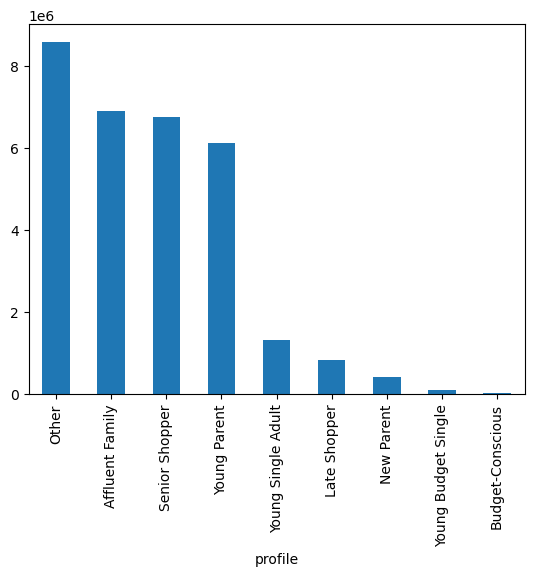

In [60]:
# Create bar chart
Prof_bar = df_anon_high_prof['profile'].value_counts().plot.bar()

In [61]:
# Export bar chart
Prof_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_customer_profiles_sample.png'))

Question 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

9.  Aggregate Mean, Max, Min on Customer Profiles for Expenditure and User Frequency 

For usage frequency I will use order_number and for expenditure I will use avg_proce_per_user

In [62]:
# Aggregate profiles
agg_profiles = df_anon_high_prof.groupby('profile').agg({'avg_price_per_user': ['mean', 'min', 'max'],'order_number': ['mean', 'min', 'max']})

In [63]:
agg_profiles

avg_price_per_user                      order_number      \
                                  mean       min        max         mean min   
profile                                                                        
Affluent Family               7.954512  4.465854  20.114286    17.831184   1   
Budget-Conscious              4.385468  1.000000   4.998077    13.003409   1   
Late Shopper                  7.773227  1.000000  15.800000    17.680155   1   
New Parent                    7.828636  1.425000  15.706667    19.885476   1   
Other                         7.737074  1.522222  18.233333    17.961748   1   
Senior Shopper                7.711527  1.262500  19.400000    17.636148   1   
Young Budget Single           6.491353  2.600000   7.000000    16.485326   1   
Young Parent                  7.785613  1.628571  14.900000    17.825653   1   
Young Single Adult            7.871586  2.100000  14.761905    17.716474   1   

                         
                    max  
profile                  
Affluent Family      99  
Budget-Conscious     99  
Late Shopper         99  
New Parent           99  
Other                99  
Senior Shopper       99  
Young Budget Single  99  
Young Parent         99  
Young Single Adult   99

In [64]:
# Export agg_profiles
agg_profiles.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'agg_customer_profiles_expenditure_frequency.pkl'))

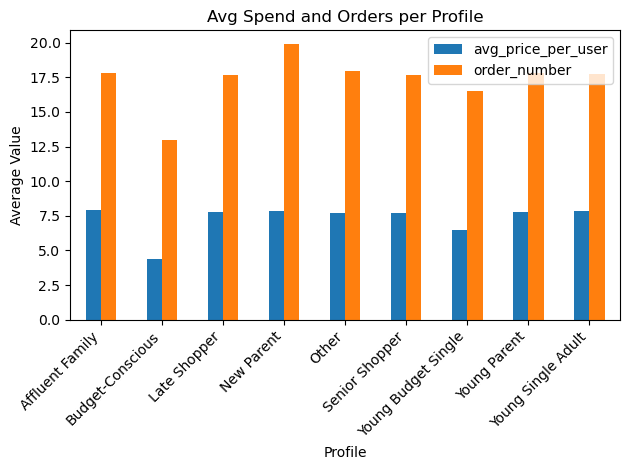

In [88]:
# Create bar chart 
agg_bar_chart = agg_profiles.xs('mean', axis=1, level=1).plot.bar(
    title='Avg Spend and Orders per Profile')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Value')
plt.xlabel('Profile')
plt.tight_layout()
plt.savefig('avg_spend_orders_by_profile.png', bbox_inches='tight')


In [87]:
# Export chart
agg_bar_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_avg_spend_orders_per_profile.png'))

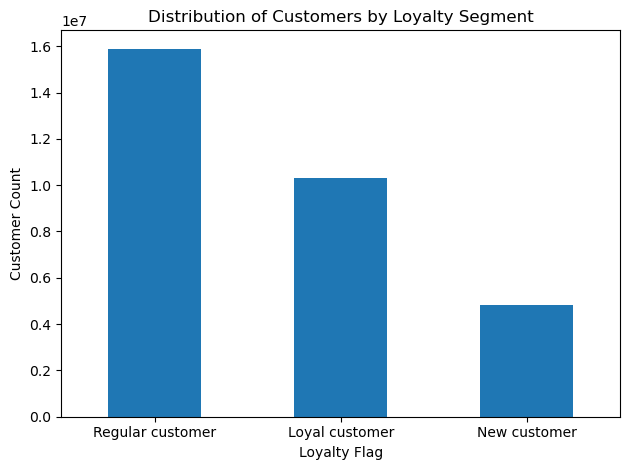

In [89]:
# Create a loyalty bar chart
loyalty_bar = df_anon_high_dept['loyalty_flag'].value_counts().plot(kind='bar')
plt.title("Distribution of Customers by Loyalty Segment")
plt.xlabel("Loyalty Flag")
plt.ylabel("Customer Count")
plt.xticks(rotation=0)
plt.tight_layout()


In [91]:
# Save and export bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_flag_bar.png'))

Question 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

11. Comparison of Regions and Departments Based on Customer Profiles Visualisations

In [67]:
# Check how many users from each profile are in each region
profile_region = df_anon_high_prof.groupby(['region', 'profile']).agg({'user_id': 'count'})

In [68]:
# Check output
profile_region

user_id
region    profile                     
Midwest   Affluent Family      1642249
          Budget-Conscious        5197
          Late Shopper          192473
          New Parent             95563
          Other                2027991
          Senior Shopper       1551691
          Young Budget Single    21297
          Young Parent         1427032
          Young Single Adult    304262
Northeast Affluent Family      1234549
          Budget-Conscious        3921
          Late Shopper          142100
          New Parent             72465
          Other                1473633
          Senior Shopper       1210936
          Young Budget Single    18787
          Young Parent         1071485
          Young Single Adult    242204
South     Affluent Family      2260790
          Budget-Conscious        8792
          Late Shopper          273270
          New Parent            139333
          Other                2852011
          Senior Shopper       2250602
          Young Budget Single    34823
          Young Parent         2048145
          Young Single Adult    452895
West      Affluent Family      1749977
          Budget-Conscious        5554
          Late Shopper          207515
          New Parent            102284
          Other                2225834
          Senior Shopper       1730144
          Young Budget Single    30923
          Young Parent         1558085
          Young Single Adult    324154

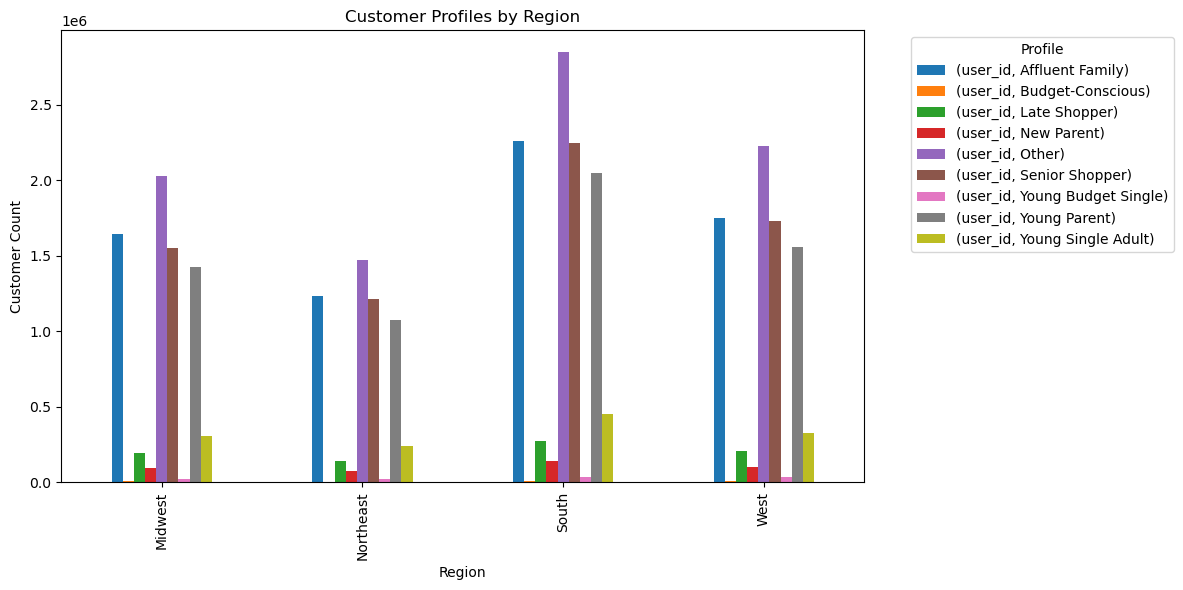

In [69]:
# Create a grouped bar chart for customer profiles in each region
bar_profile_region = profile_region.unstack().plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')

plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


<Axes: title={'center': 'Customer Profiles by Region (Stacked)'}, xlabel='region,profile'>

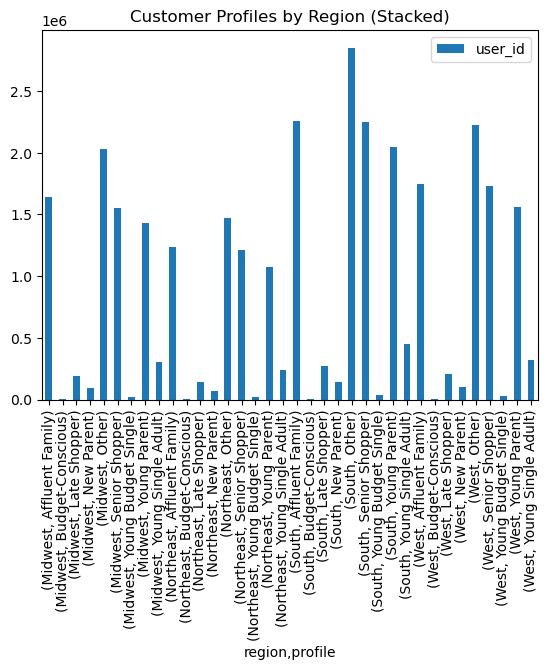

In [70]:
# Create a stacked bar chart
profile_region.plot(kind='bar', stacked=True, title='Customer Profiles by Region (Stacked)')

The stacked is too messy but in the grouped, the key/legend is too large and the chart is unclear. I will export the grouped  

In [71]:
# Export the grouped bar chart representing customer profiles per region
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_profile_region.png'))

In [72]:
# Check customer profiles per department
department_profile = df_anon_high_prof.groupby(['department', 'profile'])['user_id'].count()

In [73]:
department_profile

department  profile            
alcohol     Affluent Family         31958
            Budget-Conscious          127
            Late Shopper             2225
            Other                   41862
            Senior Shopper          31496
                                    ...  
snacks      Other                  811448
            Senior Shopper         648534
            Young Budget Single     18406
            Young Parent           556245
            Young Single Adult     111560
Name: user_id, Length: 162, dtype: int64

In [74]:
# Crosstab region and department
Cross_RegionDepartment = pd.crosstab(df_anon_high_prof['region'], df_anon_high_prof['department'], dropna=False)

In [75]:
Cross_RegionDepartment

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,NaN
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95739,261753,598979,156155,7929,237459,1212345,234464,193463,...,60666,158260,15563,7983,420334,100398,21358,2134116,645143,6388
Northeast,25017,72712,199300,462929,117904,5599,176936,914532,178398,143817,...,44678,118571,11512,6268,312731,74765,17734,1593004,493154,5479
South,48813,139511,371620,859419,223172,11180,337458,1722847,333620,272813,...,84649,224120,21787,11579,591754,142496,29909,3027478,916780,9687
West,36754,102422,288155,650574,173619,8743,260221,1326944,257352,212043,...,65998,173830,15906,8581,457886,106647,24059,2324678,711329,7365


In [76]:
# Save crosstab to clipboard
Cross_RegionDepartment.to_clipboard()

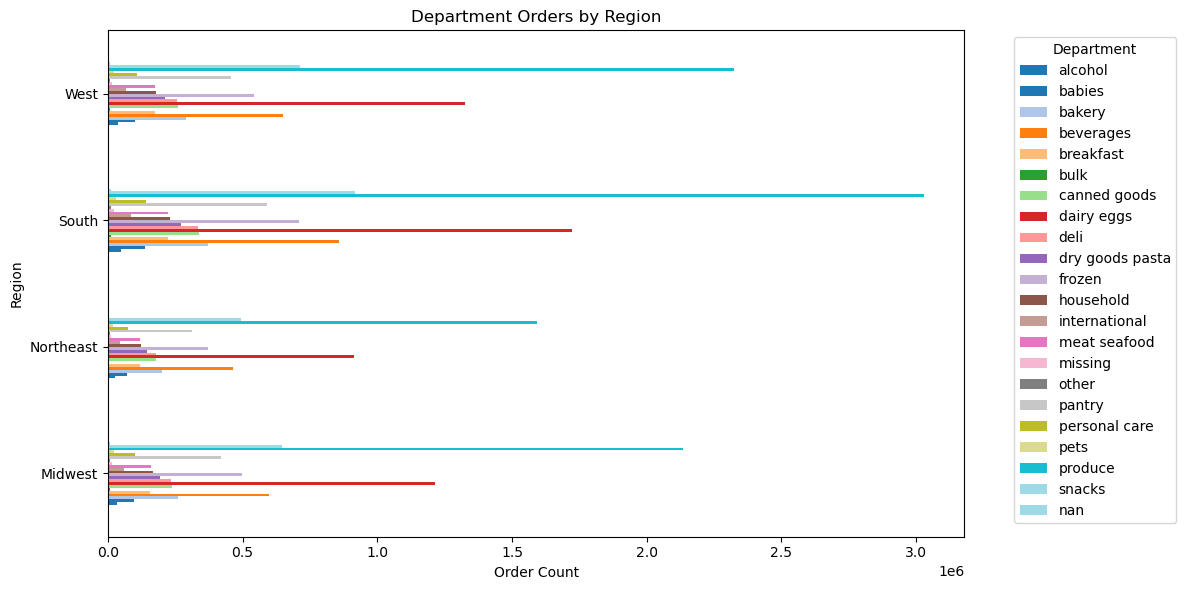

In [107]:
# Create the chart with the legend outside of the chart
crosstab_bar_region_department = Cross_RegionDepartment.plot(kind='barh', figsize=(12, 6),colormap='tab20')

plt.title('Department Orders by Region')
plt.xlabel('Order Count')
plt.ylabel('Region')
plt.legend(
    title='Department',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


In [98]:
# Export department orders by region
crosstab_bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_department_orders_by_region.png'))

as this chart contains so many departments, I will filter it down to the top departments

In [109]:
# Identify top departments
top_departments = Cross_RegionDepartment.sum(axis=0).nlargest(10).index

In [110]:
# Filter the crosstab
filtered_crosstab = Cross_RegionDepartment[top_departments]

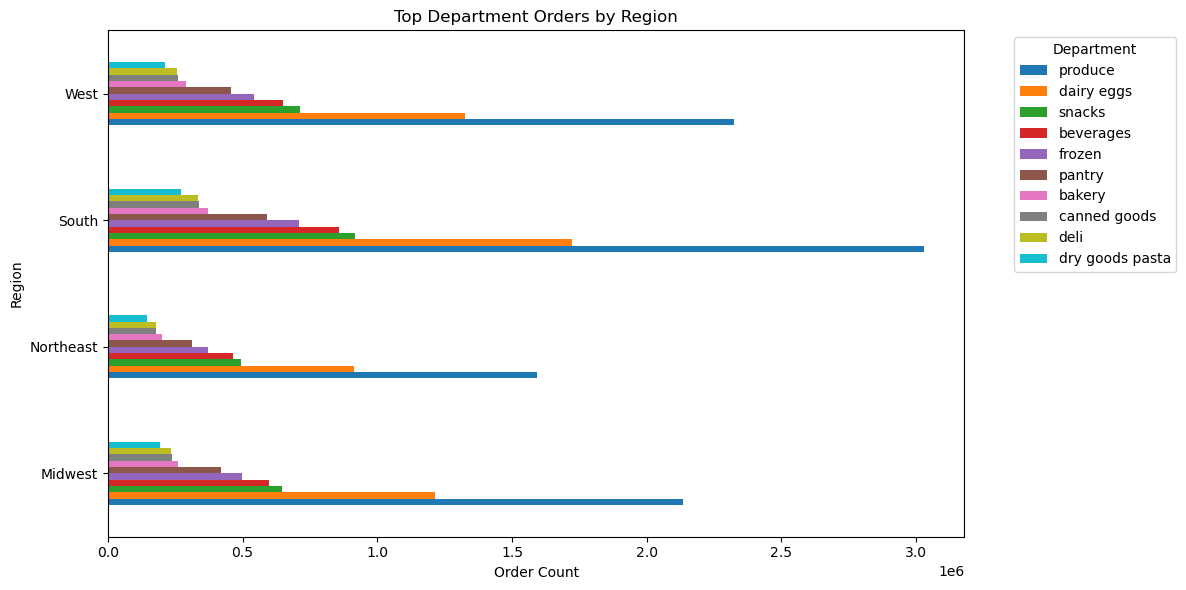

In [113]:
# Create bar chart
dep_ords_region = filtered_crosstab.plot(
    kind='barh',
    figsize=(12, 6),
    colormap='tab10')

plt.title('Top Department Orders by Region')
plt.xlabel('Order Count')
plt.ylabel('Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [114]:
# Export and Save
dep_ords_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_crosstab_departments_regions.png'))

In [80]:
profile_dept = department_profile.sort_values(ascending=False)

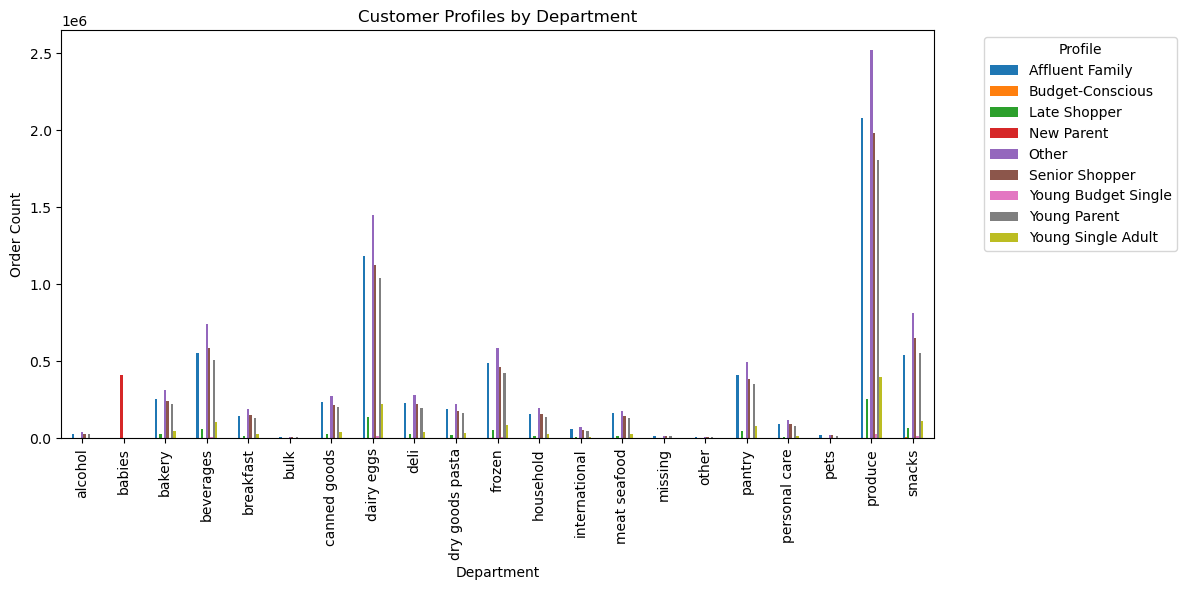

In [81]:
bar_profile_department = profile_dept.unstack().plot(kind='bar', figsize=(12, 6))

plt.title("Customer Profiles by Department")
plt.xlabel("Department")
plt.ylabel("Order Count")

plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [82]:
# Export department grouped bar chart
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_profile_department.png'))

I created three charts to comapre customer profiles by region and department. From the charts I found tha South has the highest number of orders across all profiles. The Northeast has the least. 'Affluent Family' and 'Young Parent' dominate departments like Produce and Dairy. The South and the West lead in Frozen foods.  


For my final report, I had to come back and create a bar chart for customer orders by loyalty

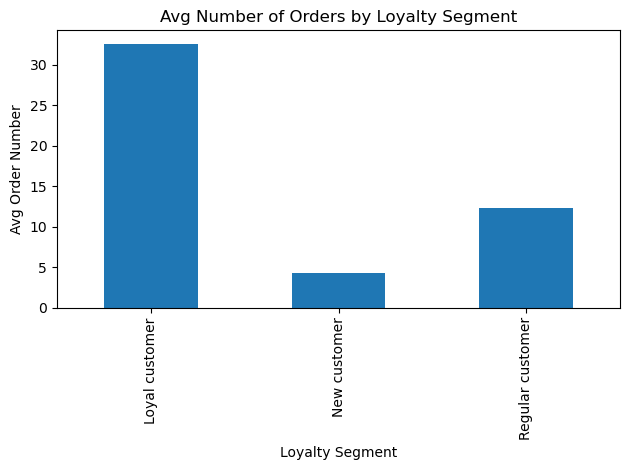

In [93]:
# Create a bar chart showing orders using loyalty flag
loyalty_orders_bar = df_anon_high_dept.groupby('loyalty_flag')['order_number'].mean().plot(kind='bar')
plt.title("Avg Number of Orders by Loyalty Segment")
plt.xlabel("Loyalty Segment")
plt.ylabel("Avg Order Number")
plt.tight_layout()


In [94]:
# Export and save bar chart
loyalty_orders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_orders_bar.png'))

11. Export Dataframes

In [83]:
# Export original dataframe
df_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [84]:
# Export df_merged_anon_high
df_anon_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [85]:
# Export high activity customers with profiles dataframe 
df_anon_high_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers_with_profiles.pkl'))